# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# View top 5 rows of Mouse data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# View top 5 rows of Study Results data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice.
mice_count = len(merged_df["Mouse ID"].unique())
mice_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html#pandas.DataFrame.duplicated
duplicate_data = merged_df[merged_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]["Mouse ID"].unique()
duplicate_data

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = merged_df.loc[merged_df["Mouse ID"] == "g989",:]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.loc[merged_df["Mouse ID"] != "g989",:]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(cleaned_df["Mouse ID"].unique())
mice_count

248

## Summary Statistics

In [10]:
regimen_sem = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume":regimen_mean,
                             "Median Tumor Volume":regimen_median,
                             "Tumor Volume Variance":regimen_var,
                             "Tumor Volume Std. Dev.":regimen_std,
                             "Tumor Volume Std. Err.":regimen_sem})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = cleaned_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

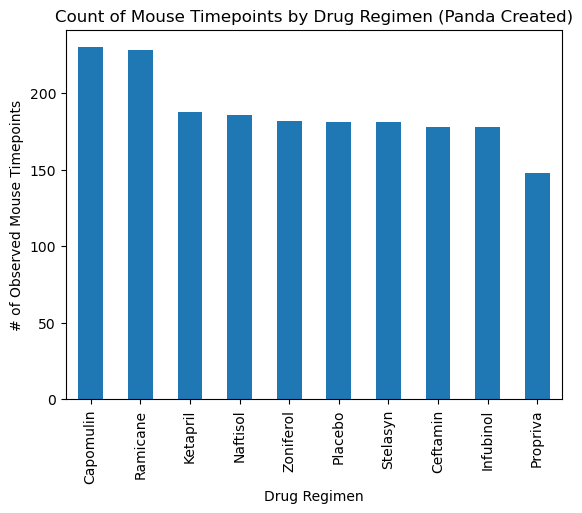

In [13]:
# Filter DataFrame to only required columns: "Drug Regimen" and "Mouse ID" counts
mouse_timepoints = cleaned_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints.plot(kind="bar",
                         xlabel="Drug Regimen",
                         ylabel="# of Observed Mouse Timepoints",
                         title="Count of Mouse Timepoints by Drug Regimen (Panda Created)")
plt.show()

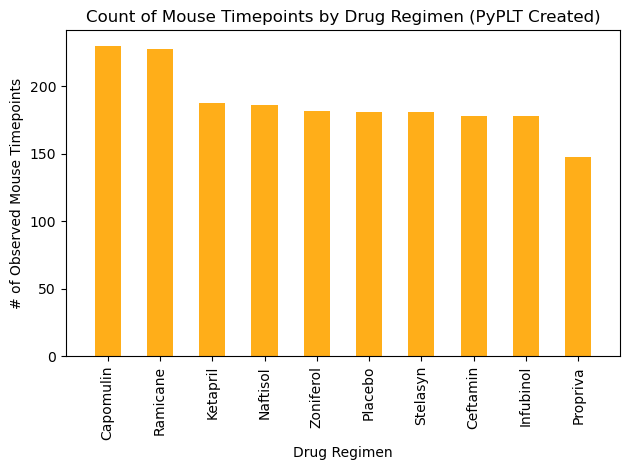

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Get x_axis category count
x_axis = np.arange(len(mouse_timepoints.index))
x_axis

# Drug names
drug_regimens = mouse_timepoints.index

# Get tick locations
tick_locations = [n for n in x_axis]

plt.bar(x_axis, mouse_timepoints, color="orange", align="center", alpha=0.9, width=0.5)
plt.xticks(tick_locations, drug_regimens, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Count of Mouse Timepoints by Drug Regimen (PyPLT Created)")
plt.xlim(-0.8,len(x_axis)-0.2)
plt.ylim(0, max(mouse_timepoints)*1.05)
plt.tight_layout()
plt.show()

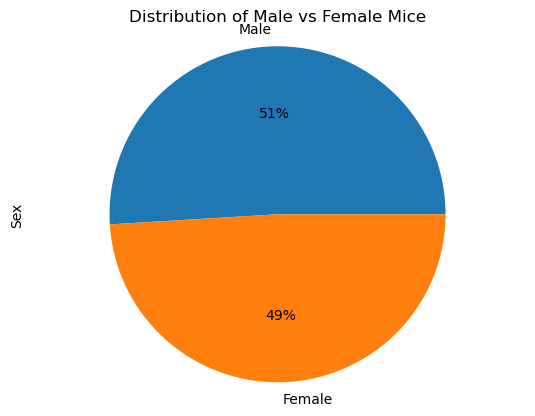

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = cleaned_df[["Mouse ID", "Sex"]]
mice_gender = mice_gender.groupby("Sex")["Sex"].count().sort_values(ascending=False)
mice_gender

mice_gender.plot(kind="pie", y=mice_gender, title="Distribution of Male vs Female Mice", startangle=0,
                autopct="%.0f%%")
plt.axis("equal")
plt.show()

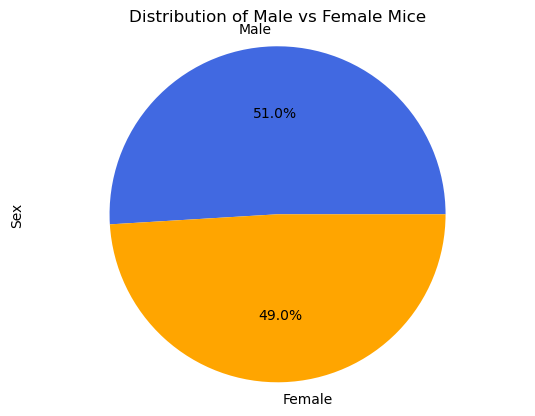

In [16]:
# Get label names
labels = mice_gender.index

# Get size values
size = mice_gender

# Colors of the pie chart
colors = ["royalblue","orange"]

# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(size, labels=labels, colors=colors, autopct="%.1f%%")
plt.title("Distribution of Male vs Female Mice")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby("Mouse ID")[["Timepoint"]].max()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_merge_df = pd.merge(max_timepoint, cleaned_df, on=["Mouse ID", "Timepoint"])

max_merge_df = max_merge_df.loc[(max_merge_df["Drug Regimen"] == "Capomulin") | \
                                (max_merge_df["Drug Regimen"] == "Ramicane") | \
                                (max_merge_df["Drug Regimen"] == "Infubinol") | \
                                (max_merge_df["Drug Regimen"] == "Ceftamin"), ["Drug Regimen","Tumor Volume (mm3)"]].sort_values("Drug Regimen").set_index("Drug Regimen")
max_merge_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,38.846876
Capomulin,38.125164
Capomulin,38.753265
Capomulin,31.023923
Capomulin,40.159220
...,...
Ramicane,31.560470
Ramicane,36.134852
Ramicane,22.050126


In [139]:
treatments = list(max_merge_df.index.unique())
treatments[3]

'Ramicane'

In [143]:
tumor_vol = []

for drug, vol in max_merge_df.items():
    if drug == treatments[0]:
        tumor_vol[0].append(vol)
    elif drug == treatments[1]:
        tumor_vol[1].append(vol)
    elif drug == treatments[2]:
        tumor_vol[2].append(vol)
tumor_vol

[]

In [14]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = max_merge_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


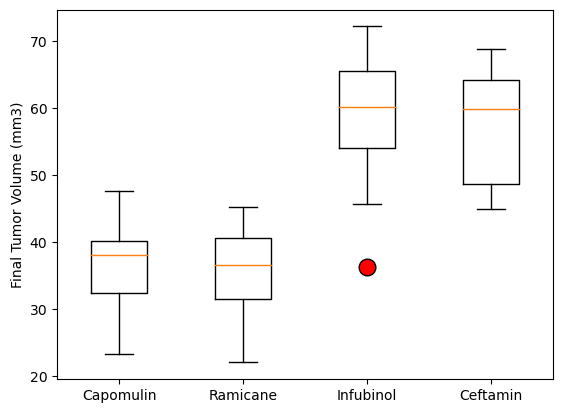

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [49]:
single_mouse_data = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509",:]
single_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21
1726,l509,25,44.006257,2,Capomulin,Male,17,21
1727,l509,30,44.708055,2,Capomulin,Male,17,21
1728,l509,35,40.207288,2,Capomulin,Male,17,21
1729,l509,40,40.770813,2,Capomulin,Male,17,21
1730,l509,45,41.483008,3,Capomulin,Male,17,21


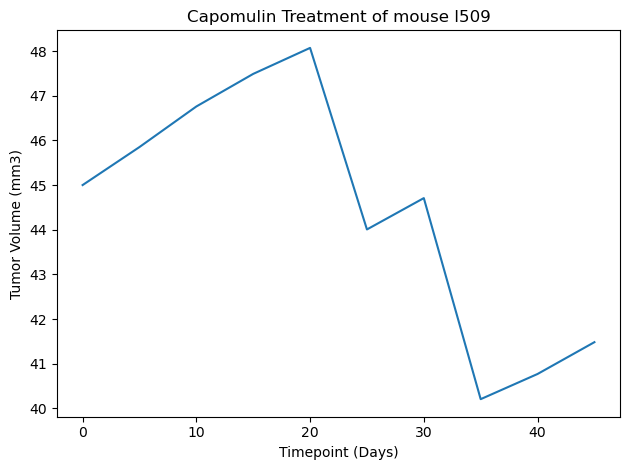

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

single_mouse_data = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509",:]

single_mouse_data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)",
                      xlabel="Timepoint (Days)", ylabel="Tumor Volume (mm3)",
                       legend=False, title="Capomulin Treatment of mouse l509")
plt.tight_layout()
plt.show()

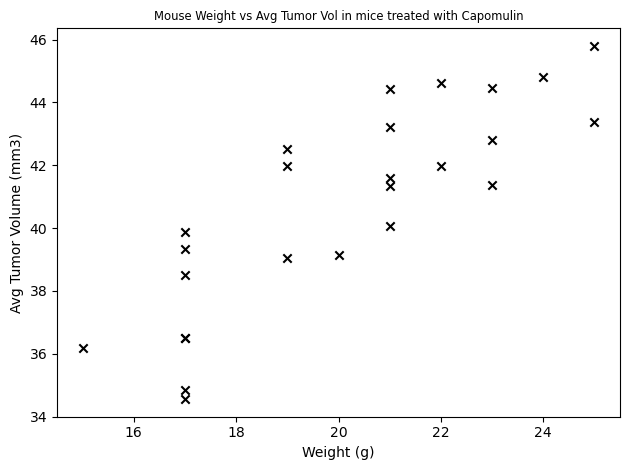

In [104]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
capomulin_df = capomulin_df.groupby("Mouse ID").mean("numeric_only")
capomulin_df

weight = capomulin_df["Weight (g)"]
mean_tumor = capomulin_df["Tumor Volume (mm3)"]

plt.scatter(weight,mean_tumor, marker="x", color="black")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mouse Weight vs Avg Tumor Vol in mice treated with Capomulin", size="small")
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


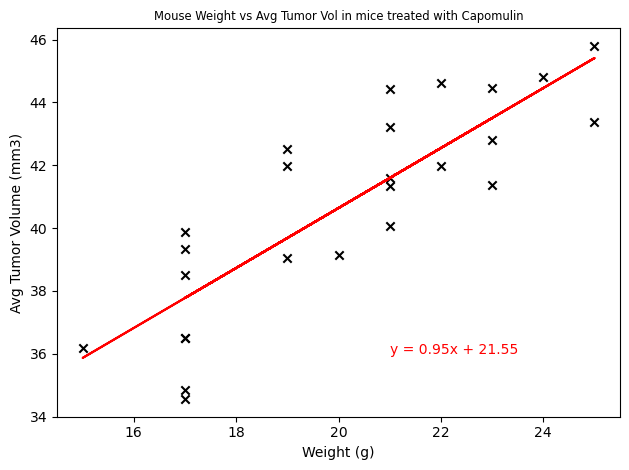

In [110]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Pearsonr correlation
correlation = st.pearsonr(weight,mean_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, mean_tumor)
regress = weight * slope + intercept
line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")

plt.scatter(weight,mean_tumor, marker="x", color="black")
plt.plot(weight,regress,"r")
plt.annotate(line_eq,(21,36),color="red",fontsize=10)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mouse Weight vs Avg Tumor Vol in mice treated with Capomulin", size="small")
plt.tight_layout()
plt.show()
